In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [2]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [3]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [4]:
X_train_p = prep_func(X_train)
X_test_p = prep_func(X_test)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_train_p, y_train, test_size=0.33, random_state=42)

In [6]:
# clustering the data
from sklearn.cluster import KMeans
clustering = KMeans().fit(X_train_p)
test_clustering = KMeans().fit(X_train_p).predict(X_test_p)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
X_train_p_clustering = X_train_p.assign(clust = clustering.labels_)
X_test_p_clustering = X_test_p.assign(clust = test_clustering)
X_trainCS, X_testCS, y_trainCS, y_testCS = train_test_split(X_train_p_clustering, y_train, test_size=0.33, random_state=42)

<AxesSubplot:title={'center':'Count (target)'}>

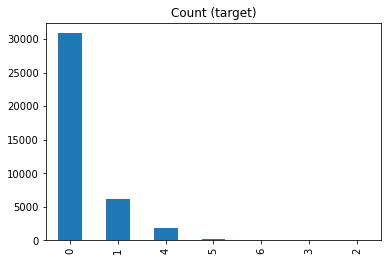

In [8]:
#clusters of class 0
X_train_p_clustering['clust'][y_train == 0].value_counts().plot(kind='bar', title='clusters of class 0')

<AxesSubplot:title={'center':'Count (target)'}>

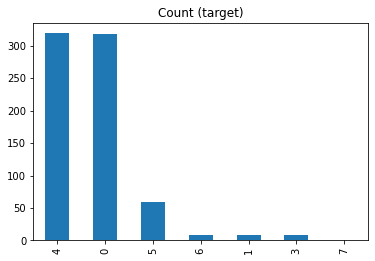

In [9]:
#clusters of class 1
X_train_p_clustering['clust'][y_train == 1].value_counts().plot(kind='bar', title='clusters of class 1')

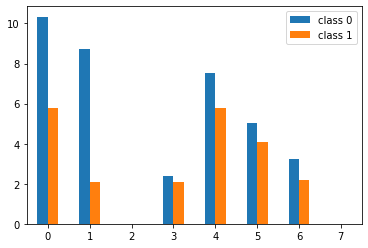

In [10]:
#distribution of classes in clusters
df = pd.DataFrame({'class 0': np.log(X_train_p_clustering['clust'][y_train == 0].value_counts()),
                   'class 1': np.log(X_train_p_clustering['clust'][y_train == 1].value_counts())})
ax = df.plot.bar(rot=0)

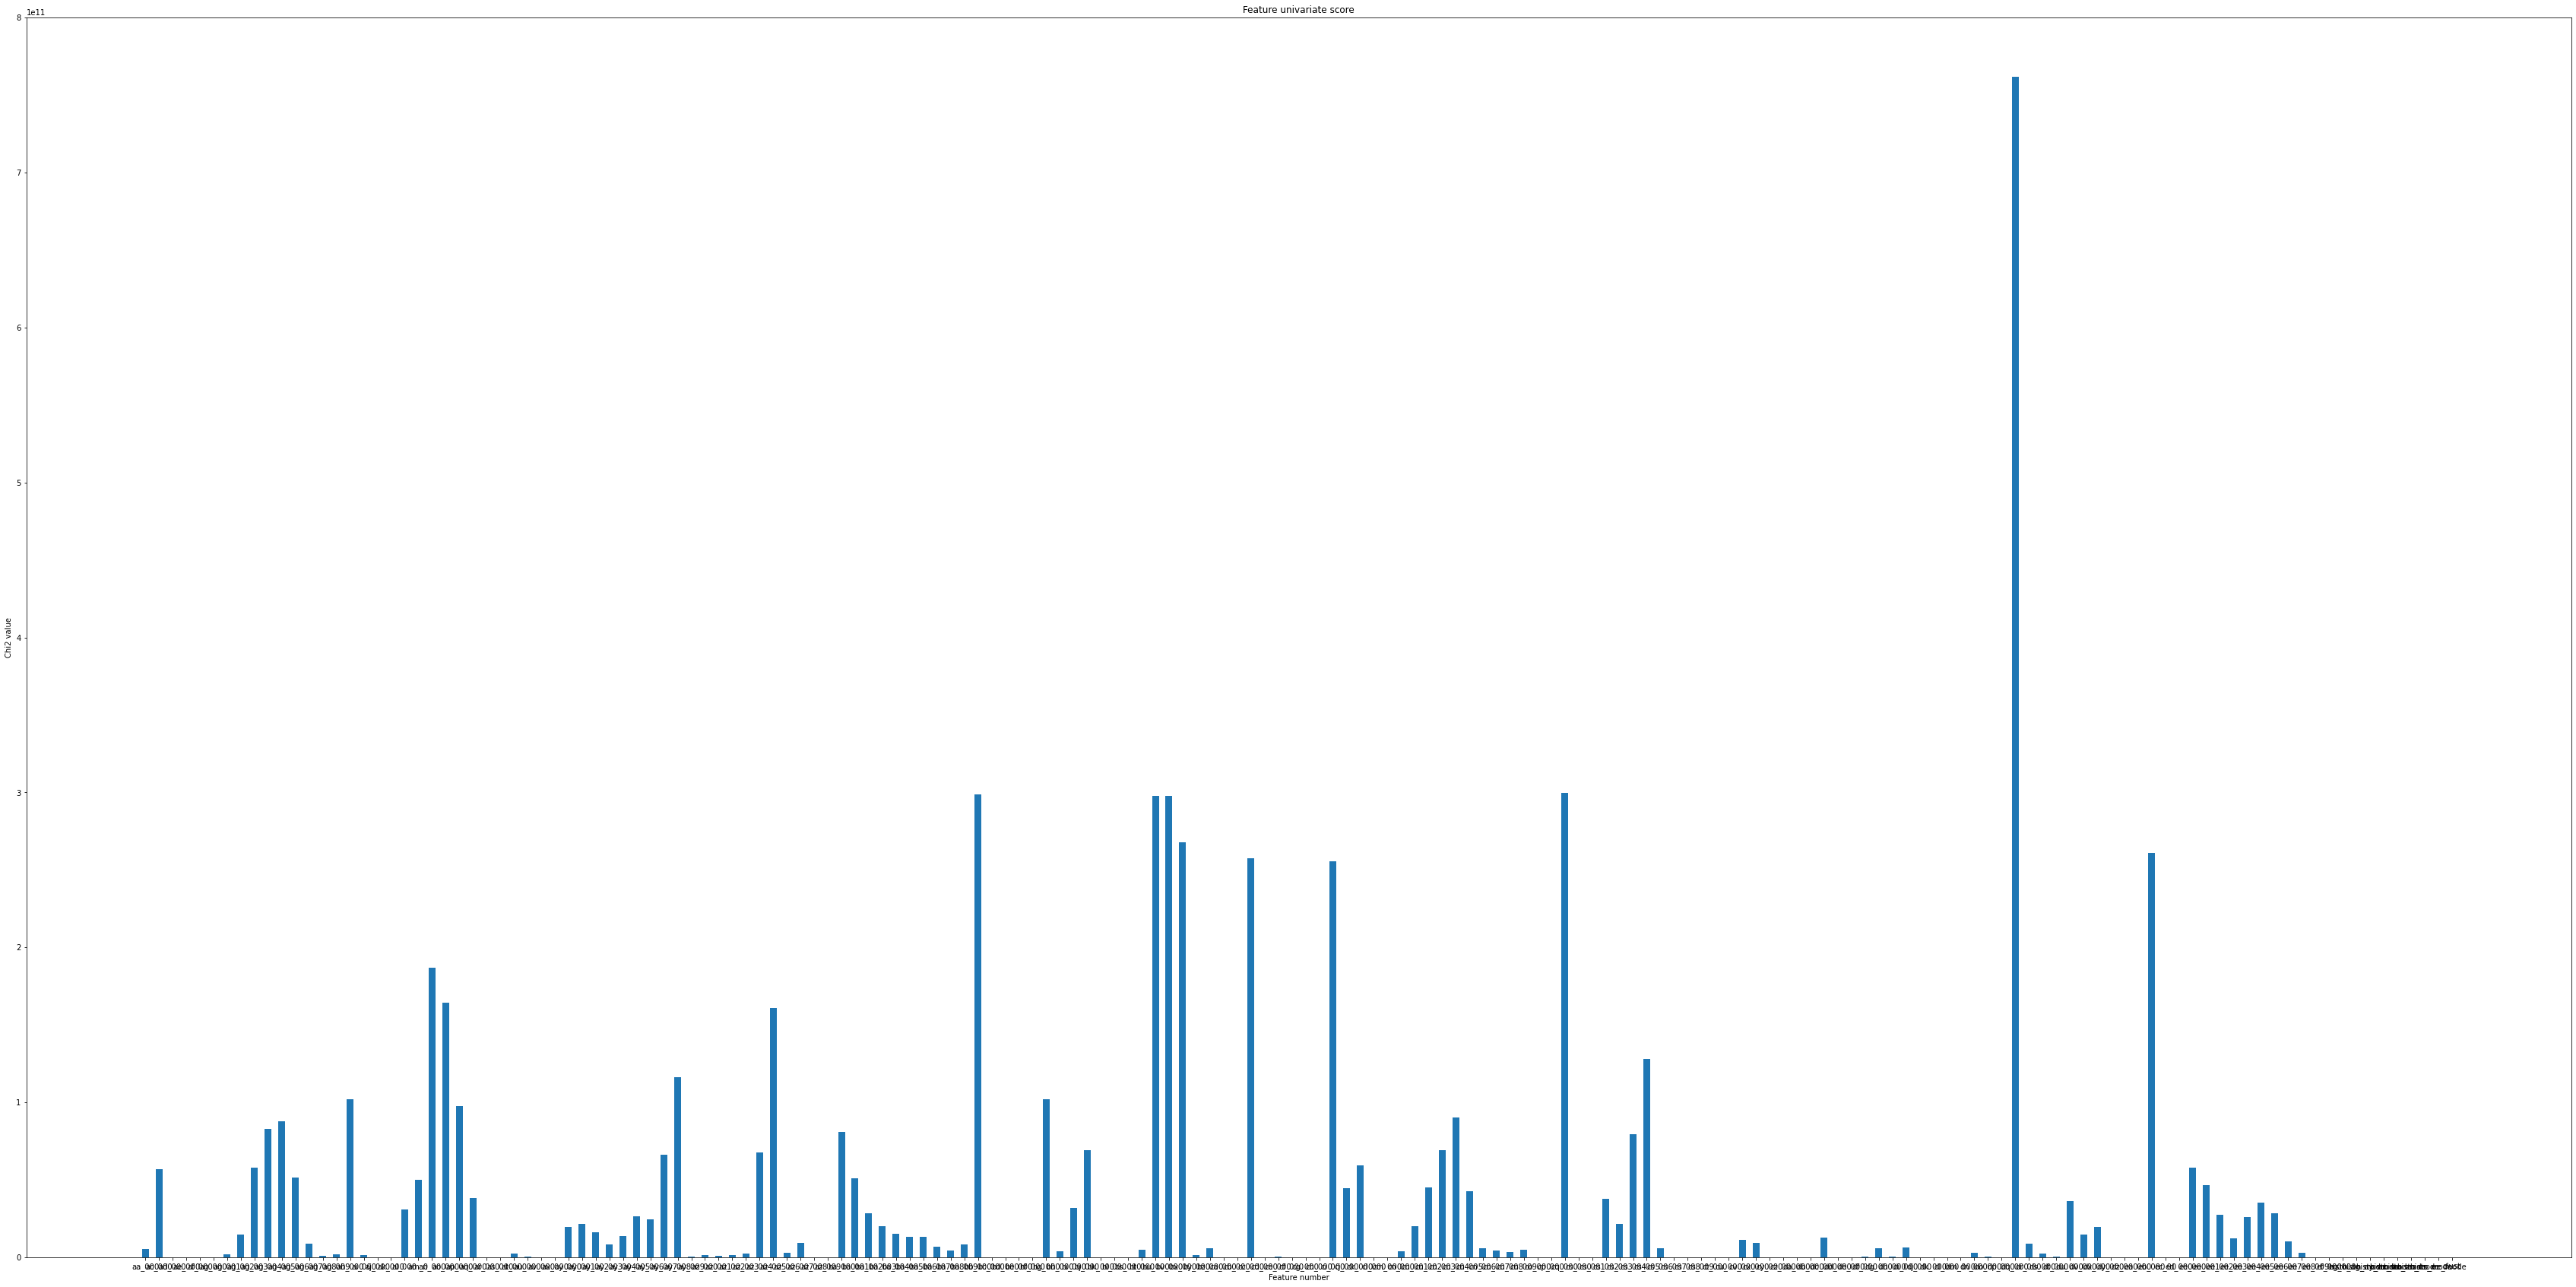

In [41]:
# importance of the cluster feature according to chi2 (not important)
from sklearn.feature_selection import SelectKBest, f_classif, chi2
#Feature Selection
scores = chi2(X_train_p_clustering, y_train)[0]
#X_indices = np.arange(X.shape[-1])
fig= plt.figure(figsize=(60,30))
#plt.figure(1)
plt.clf()
plt.bar(X_train_p_clustering.columns, scores, width=0.5)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel("Chi2 value")
plt.show()

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


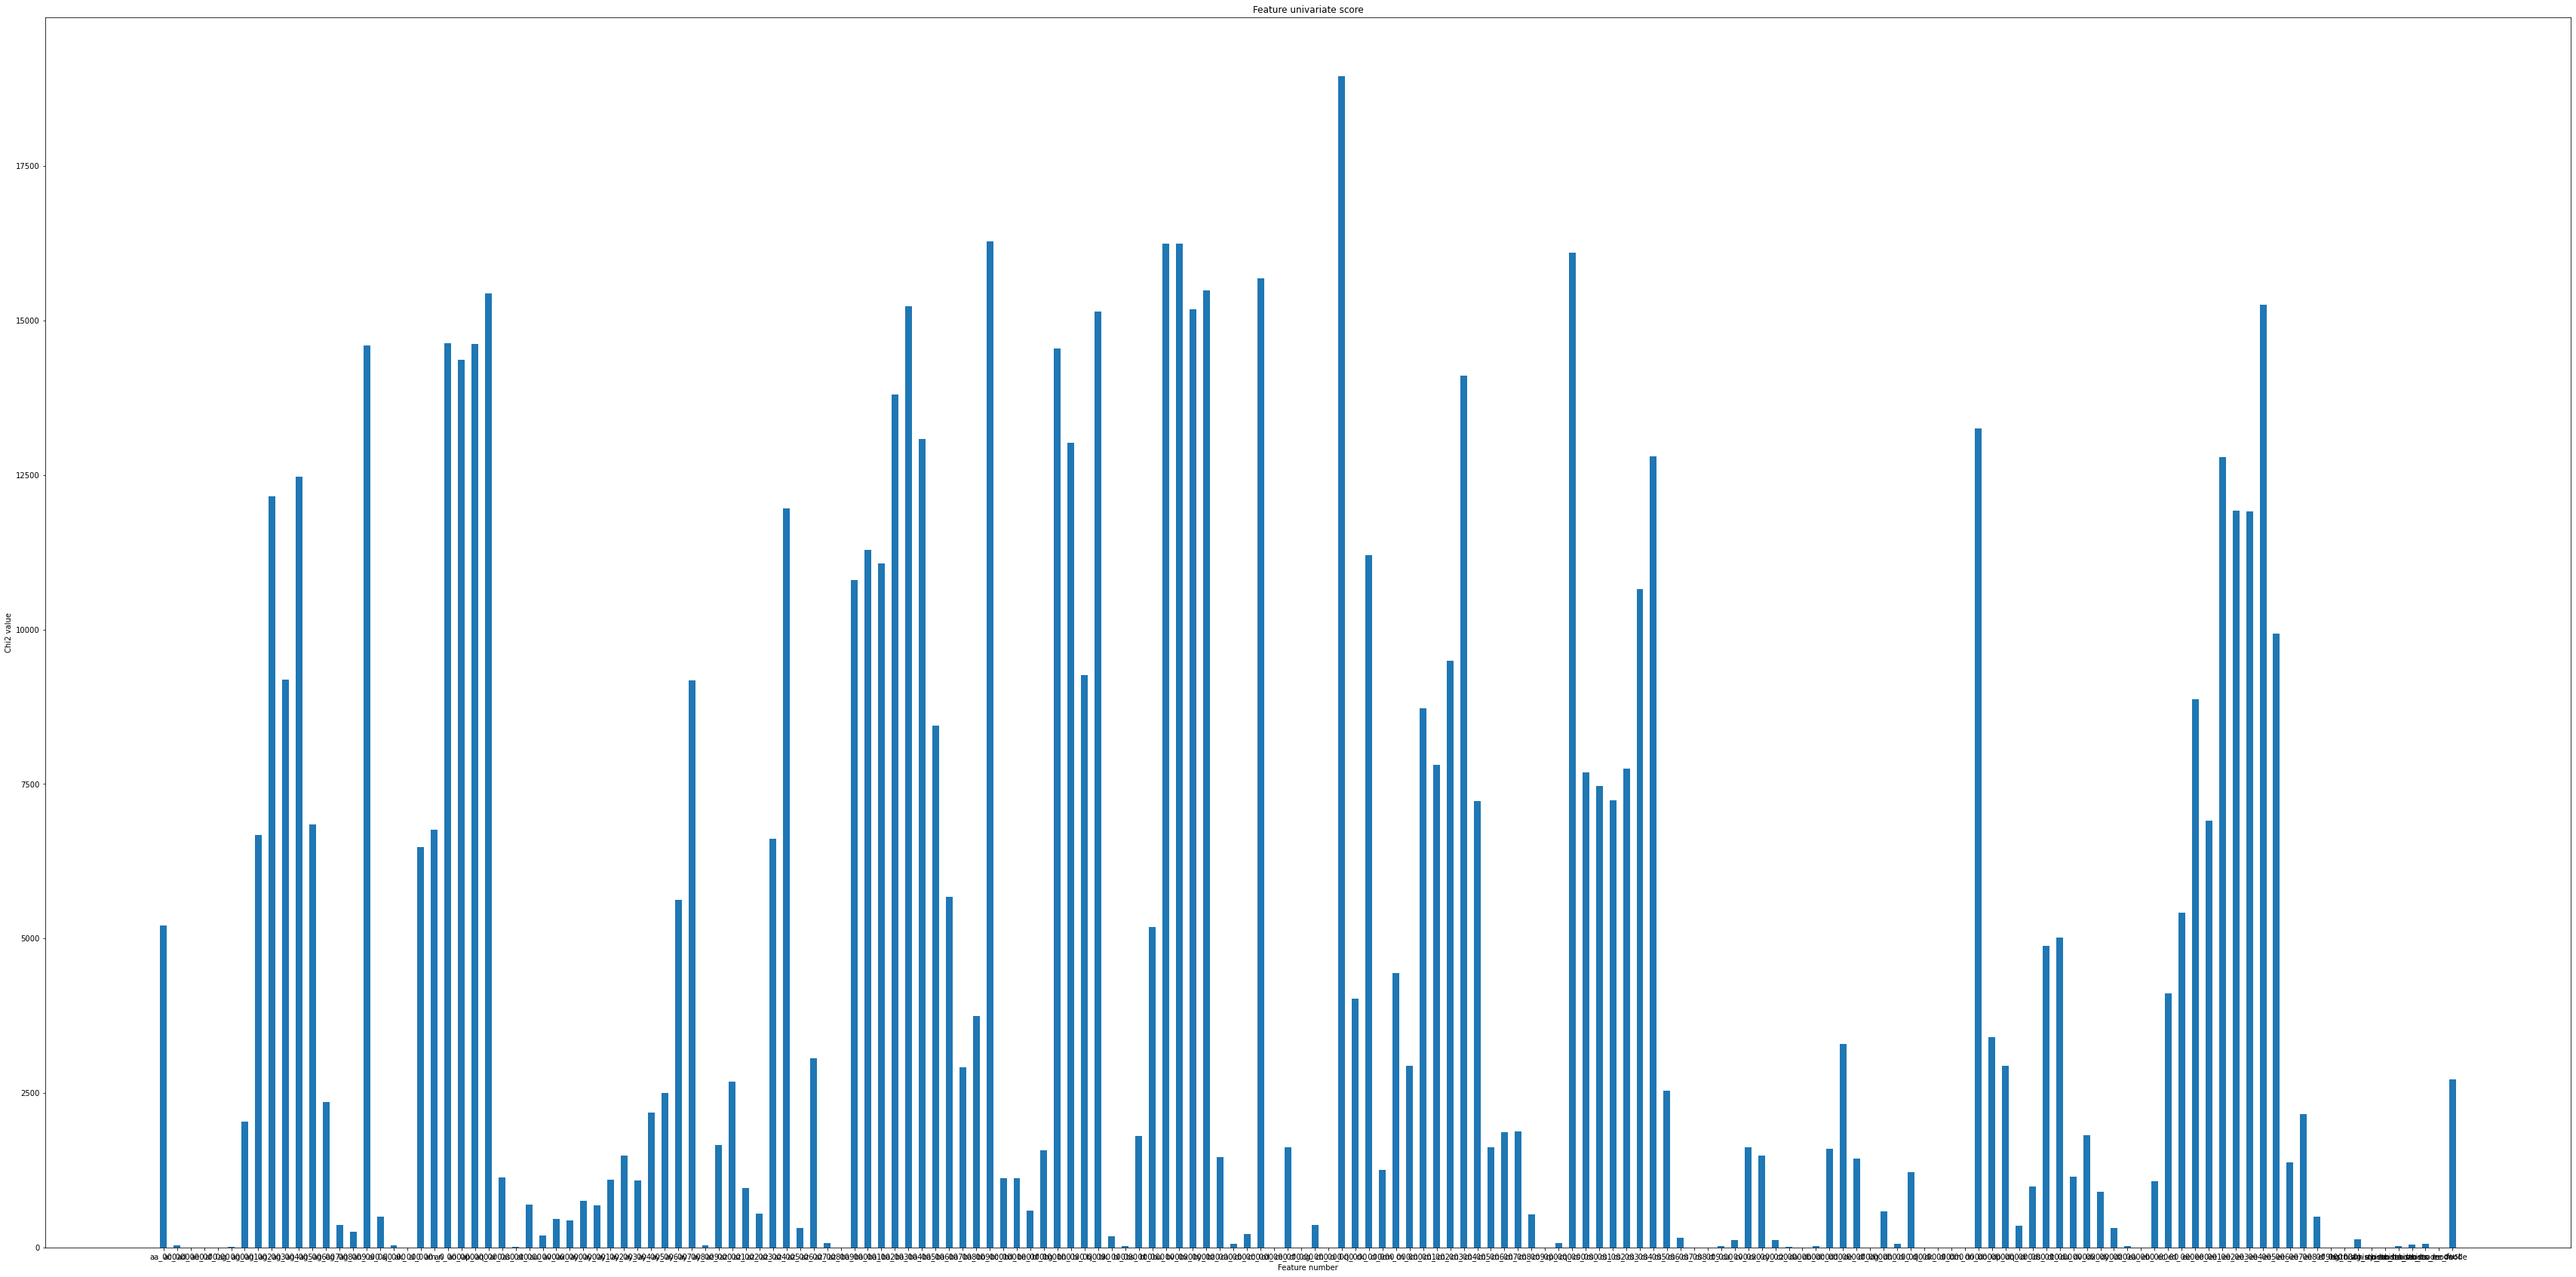

In [42]:
# importance of the cluster feature according to f_classif (a bit)
from sklearn.feature_selection import SelectKBest, f_classif, chi2
#Feature Selection
scores = f_classif(X_train_p_clustering, y_train)[0]
#X_indices = np.arange(X.shape[-1])
fig= plt.figure(figsize=(60,30))
#plt.figure(1)
plt.clf()
plt.bar(X_train_p_clustering.columns, scores, width=0.5)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel("Chi2 value")
plt.show()

In [17]:
#clusterCentroid transformation of datasets

from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

cc = ClusterCentroids(estimator=MiniBatchKMeans(), random_state=42)
X_cc, y_cc = cc.fit_resample(X_train_p, y_train)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [18]:
# transformed dataset split
X_cc_S, y_cc_S = cc.fit_resample(X_trainS, y_trainS)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [19]:
# test logreg, ClustersCentroids: CV -> over estimation
clf = LogisticRegression(C= 0.01)
pipe = make_pipeline(SelectKBest(chi2, k=100), StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_cc, y_cc, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.86531752 0.89198606 0.87290503 0.91666667 0.85794655]


In [21]:
# test logreg, ClustersCentroids: TTSplit -> good estimation
clf = LogisticRegression(C= 0.01)
pipe = make_pipeline(SelectKBest(chi2, k=100), StandardScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_cc_S, y_cc_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.7673001075654357


In [22]:
# test linSVC, ClustersCentroids: TTSplit -> good estimation
clf = linSVC(C=0.0001)
pipe = make_pipeline(SelectKBest(chi2, k=100), StandardScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_cc_S, y_cc_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.7275483137552103


In [23]:
#applying SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_p, y_train)

In [24]:
#test linSVC, SMOTE: CV -> over estimation
clf = linSVC(C=0.0001)
pipe = make_pipeline(SelectKBest(chi2, k=100), StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(pipe, X_res, y_res, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.90289389 0.9115912  0.90808559 0.90849471 0.9050321 ]


In [26]:
#transformed DataSet splitting
X_res_S, y_res_S = sm.fit_resample(X_trainS, y_trainS)

In [37]:
#test linSVC, SMOTE: CV -> good estimation
clf = linSVC(C=0.0001)
pipe = make_pipeline(SelectKBest(chi2, k=105), StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8171641791044776


In [38]:
#test Logreg, SMOTE: CV -> good estimation
clf = LogisticRegression(C= 0.01)
pipe = make_pipeline(SelectKBest(chi2, k=105), StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8289768483943243


In [ ]:
#testing other classifiers

In [34]:
# good datasplit
clf = linSVC(C= 0.001)
pipe = make_pipeline(SelectKBest(chi2, k=105), StandardScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8260704812428948


In [36]:
y_pred = pipe.fit(X_res, y_res).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo540.csv', index=False)

In [19]:
clf = LogisticRegression(penalty='l2', dual=False, C=0.01, fit_intercept=True, intercept_scaling=1, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(SelectKBest(chi2, k=105), MinMaxScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

0.7716814159292035


In [29]:
# good datasplit
clf = LogisticRegression(C= 0.01)
pipe = make_pipeline(SelectKBest(chi2, k=109), StandardScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

0.8302169035153328


In [35]:
clf= LogisticRegression(C= 0.01)
pipe = make_pipeline(SelectKBest(f_classif, k=70), StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8205689277899344


In [36]:
y_pred = pipe.fit(X_res, y_res).predict(X_test_p)
y_pred_sol = {}
y_pred_sol['Id']=list(range(17100))
y_pred_sol['Predicted']=list((y_pred))
df = pd.DataFrame(y_pred_sol, columns = ['Id', 'Predicted'])
df.to_csv('momo510.csv', index=False)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [18]:
clf = linSVC(C= 0.01, tol = 0.000001)
pipe = make_pipeline(SelectKBest(f_classif, k=80), StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8144796380090498


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
clf = linSVC(C= 0.0001)
pipe = make_pipeline(SelectKBest(chi2, k=90), StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

0.7979120059656973


In [16]:
clf = linSVC(C= 0.01, tol = 0.000001)
pipe = make_pipeline( StandardScaler(), clf)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8197343453510438


In [14]:
from sklearn.ensemble import RandomForestClassifier
#min_samples_split= 5,
clf = RandomForestClassifier(random_state=0, max_depth= 10,  class_weight = {1:55})
pipe = make_pipeline(StandardScaler(), clf)
#pipe.fit(X_res_S, y_res_S)
y_predS = pipe.fit(X_res_S, y_res_S).predict(X_testCS)
f_score = fbeta_score(y_testCS, y_predS, beta = 3)
print(f_score)

0.7109593294008073
